# Simple Linear Regression

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import data

In [3]:
# Get dataset
df_sal = pd.read_csv('./dataset/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Analyze data

## Describe

In [8]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Distribution

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


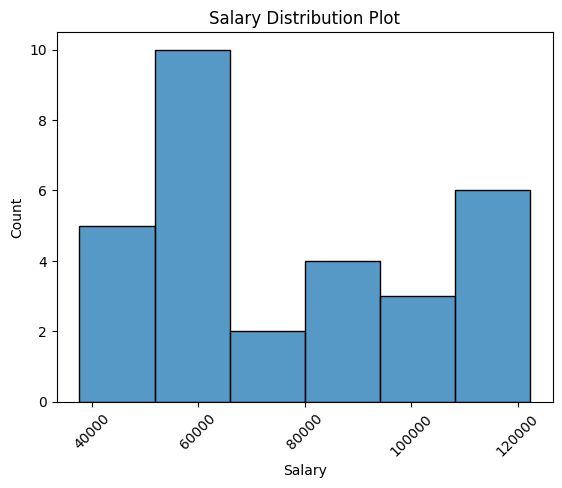

In [45]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'])
plt.xticks(rotation=45)
plt.show()

## Relationship between Salary and Experience

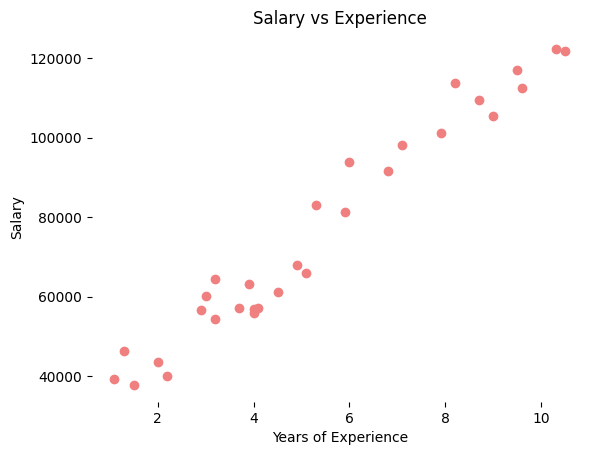

In [49]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

# Split data

## Split into Independent/Dependent variables

In [69]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

## Split into Train/Test sets

In [72]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Randomstate affect on rows**

In [88]:
#row indexes
print("Training set row indices:", X_train.index.tolist())
print("Testing set row indices:", X_test.index.tolist())

Training set row indices: [27, 11, 17, 22, 5, 16, 8, 14, 23, 20, 1, 29, 6, 4, 18, 19, 9, 7, 25, 3, 0, 21, 15, 12]
Testing set row indices: [2, 28, 13, 10, 26, 24]


# Train model

In [90]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict results

In [95]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# Visualize predictions

## Prediction on training set

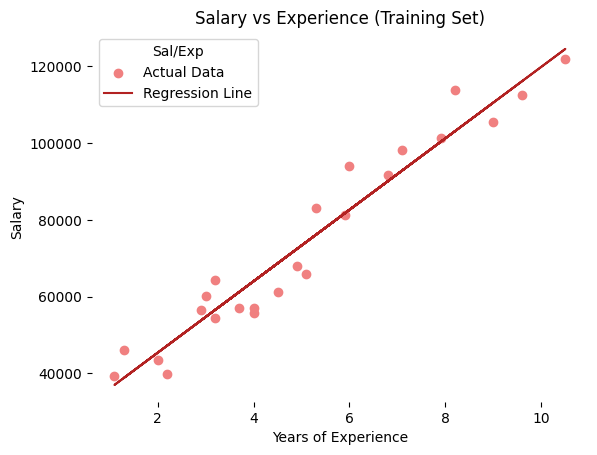

In [97]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral',label='Actual Data')
plt.plot(X_train, y_pred_train, color = 'firebrick',label='Regression Line')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend( title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Prediction on test set

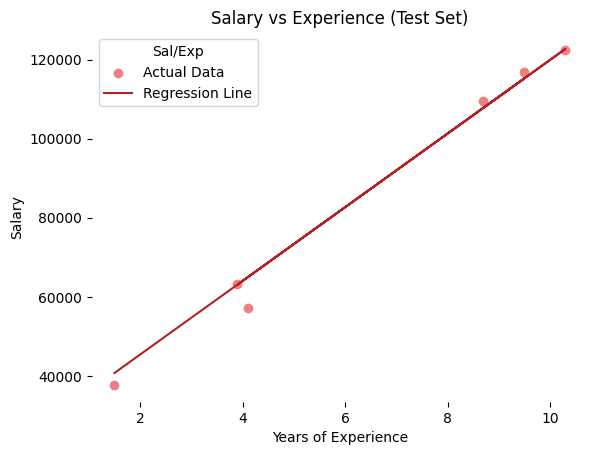

In [101]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral',label='Actual Data')
plt.plot(X_test, y_pred_test, color = 'firebrick',label='Regression Line')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend( title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Coefficient and Intercept

In [37]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_test)  # R² Score

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2446.1723690465055
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343
R² Score: 0.988169515729126


In [109]:
import numpy as np

# New data for prediction (Years of Experience)
new_experience = np.array([[1.5], [3.2], [5.8], [10.0]])  # Modify or add more values

# Predict salaries for the new experience values
predicted_salaries = regressor.predict(new_experience)

# Display results
for exp, sal in zip(new_experience.flatten(), predicted_salaries.flatten()):
    print(f"Years of Experience: {exp} --> Predicted Salary: ${sal:.2f}")


Years of Experience: 1.5 --> Predicted Salary: $40748.96
Years of Experience: 3.2 --> Predicted Salary: $56580.34
Years of Experience: 5.8 --> Predicted Salary: $80793.03
Years of Experience: 10.0 --> Predicted Salary: $119905.85


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
